# Project 12: Matrix eigenvalues and the Google’s PageRank algorithm

In [1]:
#Q1. Load the adjacency matrix from 'AdjMatrix.mat', convert it to a sparse matrix format, and calculate the percentage of non-zero elements (sparsity).
import scipy.io
from scipy.sparse import csr_matrix

# Load the network data
data = scipy.io.loadmat("AdjMatrix.mat")  # Fix: store loaded .mat file into a variable
AdjMatrix = csr_matrix(data['AdjMatrix'])  # Convert to sparse matrix

# Check the sparsity of the matrix
num_elements = AdjMatrix.shape[0] * AdjMatrix.shape[1]
num_non_zero_elements = AdjMatrix.nnz
nnzAdjMatrix = num_non_zero_elements / num_elements

print(f"Sparsity of AdjMatrix: {nnzAdjMatrix:.4%}")  # Show percentage correctly

Sparsity of AdjMatrix: 0.1506%


In [2]:
#Q2. Check the dimensions of the matrix AdjMatrix and store them in variables m and n.
# Check the dimensions of the matrix
m, n = AdjMatrix.shape
print(f"Dimensions of AdjMatrix: {m} x {n}")

Dimensions of AdjMatrix: 8297 x 8297


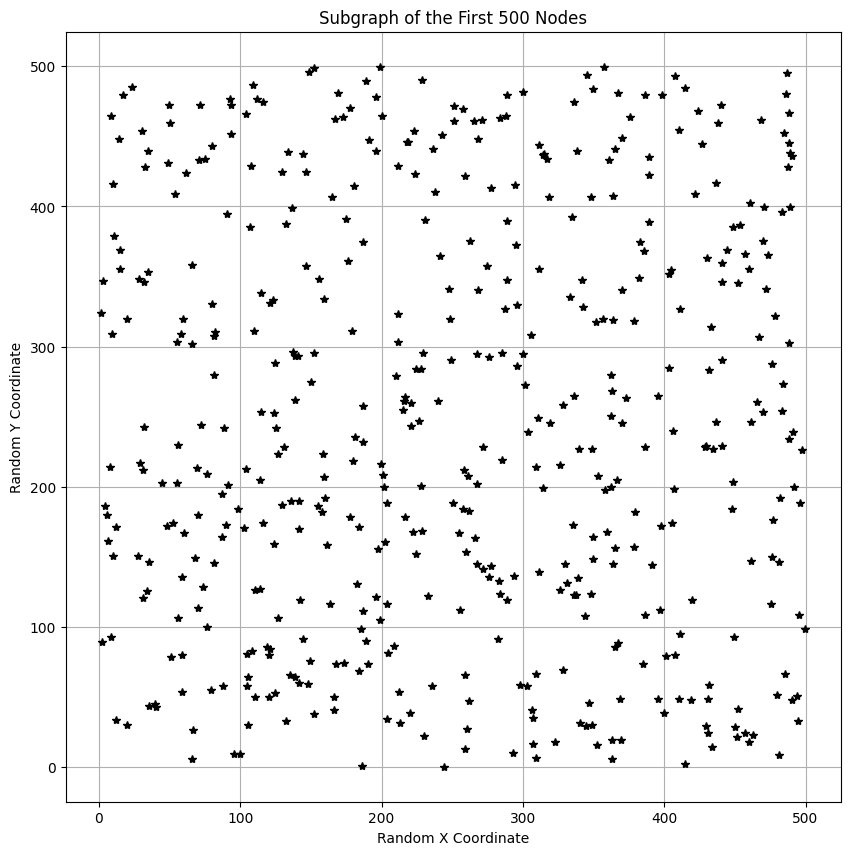

AdjMatrixSmall shape: (500, 500)
Coordinates shape: (500, 2)
NumNetwork: 500


In [3]:
#Q3. Extract the first 500 nodes from the adjacency matrix into a new submatrix `AdjMatrixSmall`, generate random coordinates, and plot the subgraph.
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Create a smaller submatrix and plot the network
NumNetwork = 500
AdjMatrixSmall = AdjMatrix[:NumNetwork, :NumNetwork].toarray()  # Extract submatrix

# Generate random coordinates for the nodes
np.random.seed(0)  # For reproducibility
coordinates = np.random.rand(NumNetwork, 2) * NumNetwork

# Plot the graph
plt.figure(figsize=(10, 10))
plt.plot(coordinates[:, 0], coordinates[:, 1], 'k*')  # Fix: Removed line connection for clarity
plt.title('Subgraph of the First 500 Nodes')
plt.xlabel('Random X Coordinate')
plt.ylabel('Random Y Coordinate')
plt.grid(True)
plt.show()

# Variables
print(f"AdjMatrixSmall shape: {AdjMatrixSmall.shape}")
print(f"Coordinates shape: {coordinates.shape}")
print(f"NumNetwork: {NumNetwork}")

In [4]:
#Q4. Create the Google Matrix with damping factor α = 0.15, compute the vectors w₀, w₁, w₂, w₃, w₅, w₁₀, and calculate the difference δw = w₁₀ − w₅ to observe convergence.
# Compute the Google Matrix
alpha = 0.15
NumLinks = np.sum(AdjMatrixSmall, axis=1)

GoogleMatrix = np.zeros((NumNetwork, NumNetwork))
for i in range(NumNetwork):
    if NumLinks[i] != 0:
        GoogleMatrix[i, :] = AdjMatrixSmall[i, :] / NumLinks[i]
    else:
        GoogleMatrix[i, :] = 1.0 / NumNetwork  # Dangling node fix

# Apply damping factor
GoogleMatrix = (1 - alpha) * GoogleMatrix + alpha * np.ones((NumNetwork, NumNetwork)) / NumNetwork

# Compute vectors w0, w1, w2, w3, w5, w10
w0 = np.ones(NumNetwork) / NumNetwork  # Fix: use 1/N instead of 1/sqrt(N)
w1 = w0 @ GoogleMatrix
w2 = w1 @ GoogleMatrix
w3 = w2 @ GoogleMatrix
w5 = w0 @ np.linalg.matrix_power(GoogleMatrix, 5)
w10 = w0 @ np.linalg.matrix_power(GoogleMatrix, 10)

# Compute the difference
deltaw = w10 - w5
print("Difference δw:", np.linalg.norm(deltaw))

Difference δw: 0.005371384600690929


In [5]:
#Q5. Compute the eigenvalues and both left and right eigenvectors of the Google Matrix. Extract the ones corresponding to eigenvalue λ₁ = 1 and denote the left eigenvector as u₁.
from numpy.linalg import eig

# Compute eigenvalues and right eigenvectors
eigenvalues, right_eigenvectors = eig(GoogleMatrix)

# Find the index of eigenvalue λ₁ ≈ 1
lambda_1_index = np.isclose(eigenvalues, 1)

# Extract the right eigenvector corresponding to λ₁ = 1
v1 = right_eigenvectors[:, lambda_1_index].flatten()

# Compute eigenvalues and left eigenvectors (from transpose of G)
left_eigenvalues, left_eigenvectors = eig(GoogleMatrix.T)

# Extract the left eigenvector corresponding to λ₁ = 1
u1 = left_eigenvectors[:, lambda_1_index].flatten()

print("Left Eigenvector (u1):", u1)

Left Eigenvector (u1): [0.00812904+0.j 0.00812904+0.j 0.05702564+0.j 0.00812904+0.j
 0.00812904+0.j 0.06186702+0.j 0.00812904+0.j 0.06811084+0.j
 0.00812904+0.j 0.11192951+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.05203524+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.04062909+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.03169821+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.3886436 +0.j
 0.06800021+0.j 0.03281252+0.j 0.00812904+0.j 0.03374585+0.j
 0.0651633 +0.j 0.06022539+0.j 0.12225881+0.j 0.03297814+0.j
 0.00812904+0.j 0.02727024+0.j 0.04807029+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.03899168+0.j 0.09506016+0.j 0.00812904+0.j 0.00812904+0.j
 0.00812904+0.j 0.07554265+0.j 0.12527133+0.j 0.1324135 +0.j
 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j 0.00812904+0.j
 0.04593397+0.j 0.00812904+0.j 0.00812904+0.j 0.00866055+0.j
 

In [6]:
#Q6. Normalize the left eigenvector u₁ so that all components are positive and sum to 1.
# Normalize u1 to have all positive components and sum to 1
u1 = np.abs(u1) / np.linalg.norm(u1, 1)

In [7]:
#Q7. Find the maximum value in the vector u₁ and its corresponding index using max and argmax.
MaxRank, PageMaxRank = np.max(u1), np.argmax(u1)
print(f"MaxRank: {MaxRank}, PageMaxRank: {PageMaxRank}")

MaxRank: 0.03330511037525559, PageMaxRank: 27


In [8]:
#Q8. Determine if the highest ranked webpage is also the one with the most incoming hyperlinks by summing the columns of the adjacency matrix and finding the maximum.
# Sum of columns gives the number of incoming links for each page
MostLinks = np.sum(AdjMatrixSmall, axis=0)

# Find the page with the most incoming links
MaxLinks, PageMaxLinks = np.max(MostLinks), np.argmax(MostLinks)

print(f"MostLinks: {MostLinks}")
print(f"MaxLinks: {MaxLinks}, PageMaxLinks: {PageMaxLinks}")

MostLinks: [  0.   0.  31.   0.   0.  20.   0.  40.   0.  15.   0.   0.   0.   0.
  35.   0.   0.   0.  22.   0.   0.   0.  22.   0.   0.   0.   0. 122.
  35.  23.   0.  14.  34.  20.  43.  24.   0.  14.  23.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  19.  32.   0.   0.   0.  40.  56.  65.
   0.   0.   0.   0.  20.   0.   0.   1.   0.   0.   0.   0.   0.   0.
   0.  16.   0.   0.  64.   0.   0.   0.   0.  43.   0.   0.   0.   0.
   0.  55.   0.   0.  16.   0.   0.   0.  17.  27.  31.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  21.   0.   0.  11.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  19.   0.   0.  20.   0.  28.   0.   0.  35.   0.   0.   0.   0.  22.
   0.   0.   0.  29.   0.   0.  15.   0.   0.  20.  32.  44.  18.  18.
   1.   0.   0.   0.   0.   0.   0.   0.  14.   0.   0.   0.  12.  24.
   0.   0.  10.   0.   0.   0.  16.   0.   0.  35.   0.   0.   0.  31.
  27.   0.   0.   0.   0.   0.   0.   0.   0.  27.   0.   0.   0. 

In [9]:
#Q9. Check whether the highest ranking webpage (PageMaxRank) is the same as the one with the most incoming links (PageMaxLinks).
are_equal = PageMaxRank == PageMaxLinks
print(f"Is the highest ranking webpage the same as the page with the most hyperlinks? {are_equal}")

Is the highest ranking webpage the same as the page with the most hyperlinks? True


In [10]:
print(f"Number of hyperlinks {MostLinks[PageMaxRank]}") 

Number of hyperlinks 122.0
